In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

<h1> Last preprocessing for the most relevant 2023 dataset</h1>

<p>This is the actual preprocessing step for the final dataset that is used for the modelling stage. The majority of it is removing old redundant columns and basic NA cleaning, as well as removing those properties that are clearly not in the boundaries of the republic (as demonstrated in the graph below). The last two row removals are for unique instances that have been uncovered in the visualisation stage, and would be described accordingly.</p>

In [2]:
df = pd.read_csv("df23.csv")

In [3]:
df.head()

,Address,County,Full,Date,Full Market Price,VAT exclusive,Latitude,Longitude,Price
0,"15 ST JOHNS TERRACE, OLD YOUGHAL RD, CORK CITY",Cork,"15 ST JOHNS TERRACE, OLD YOUGHAL RD, CORK CITY...",2023-01-01,1,0,51.911373,-8.442231,160000.0
1,"2 KINGS TERRACE, CORK CITY, CORK",Cork,"2 KINGS TERRACE, CORK CITY, CORK, Cork",2023-01-01,1,0,51.901490,-8.463452,180000.0
2,"22 COVE ST, CORK CITY, CORK",Cork,"22 COVE ST, CORK CITY, CORK, Cork",2023-01-01,1,0,51.895019,-8.475927,120000.0
3,"3 PARK HILL, SKEHARD RD, CORK",Cork,"3 PARK HILL, SKEHARD RD, CORK, Cork",2023-01-01,1,0,51.886775,-8.427577,320000.0
4,"4 SULLIVANS LANE, BARRACK ST, CORK",Cork,"4 SULLIVANS LANE, BARRACK ST, CORK, Cork",2023-01-01,1,0,51.892899,-8.478891,80000.0


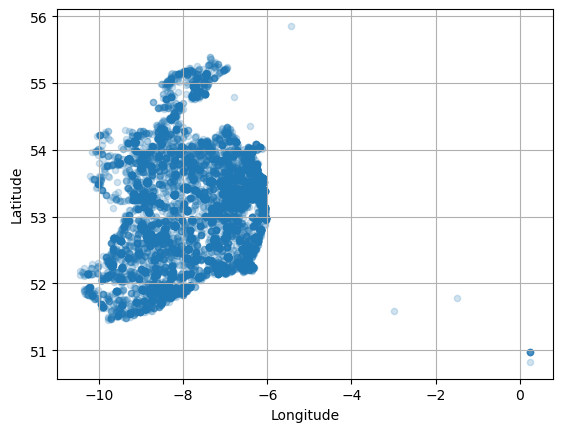

In [4]:
#original plot that contains missing values and NA's
df.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
plt.show()

In [5]:
#remove the initial errors (complete outside region)
df = df[df["Longitude"] <= -5.9]
#remove ALL na's
df = df.dropna(subset=["Latitude", "Longitude"])

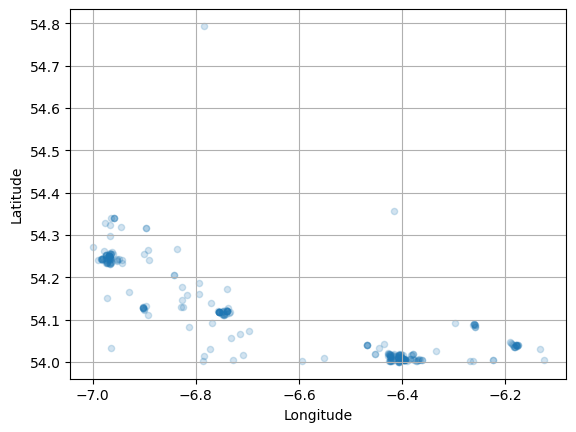

In [6]:
#select the subset with the NI examples and plot
ni = df[(df["Longitude"] <= -6) & (df["Longitude"] >= -7) & (df["Latitude"] >= 54) & (df["Latitude"] <=55)]
ni.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
plt.show()

In [7]:
ni = ni[ni["Latitude"] > 54.3]

In [8]:
ni

,Address,County,Full,Date,Full Market Price,VAT exclusive,Latitude,Longitude,Price
103,"24 VILLAGE SQUARE, CASTLE LESLIE, GLASLOUGH",Monaghan,"24 VILLAGE SQUARE, CASTLE LESLIE, GLASLOUGH, M...",2023-01-04,1,0,54.315997,-6.895754,305000.0
5375,"MOY BRIDGE, EMYVALE, CO MONAGHAN",Monaghan,"MOY BRIDGE, EMYVALE, CO MONAGHAN, Monaghan",2023-02-14,1,0,54.340991,-6.959261,305000.0
6428,"TANDERAGEE AND GILBERTSTOWN, LOWER MOYFENRATH,...",Clare,"TANDERAGEE AND GILBERTSTOWN, LOWER MOYFENRATH,...",2023-02-21,1,0,54.356105,-6.414757,150000.0
10626,"16 VILLAGE GREEN, GLASLOUGH, MONAGHAN",Monaghan,"16 VILLAGE GREEN, GLASLOUGH, MONAGHAN, Monaghan",2023-03-16,1,0,54.317278,-6.897117,240000.0
12374,"BALLINASCREENA, CAUSEWAY, KERRY",Kerry,"BALLINASCREENA, CAUSEWAY, KERRY, Kerry",2023-03-29,1,0,54.793517,-6.784265,100000.0
13496,"CARRIGANS, EMYVALE, MONAGHAN",Monaghan,"CARRIGANS, EMYVALE, MONAGHAN, Monaghan",2023-04-04,1,0,54.323099,-6.966952,270000.0
20939,"DUNDONAGH, GLASLOUGH, COUNTY MONAGHAN",Monaghan,"DUNDONAGH, GLASLOUGH, COUNTY MONAGHAN, Monaghan",2023-05-23,1,0,54.317575,-6.945346,240000.0
24477,"HILLSIDE, EMYVALE, MONAGHAN",Monaghan,"HILLSIDE, EMYVALE, MONAGHAN, Monaghan",2023-06-14,1,0,54.340652,-6.963703,250000.0
25673,"DRUMFERNESKY, CARRICKROE, EMYVALE",Monaghan,"DRUMFERNESKY, CARRICKROE, EMYVALE, Monaghan",2023-06-22,1,0,54.340991,-6.959261,80000.0
26341,"DERNASHALLOG, EMYVALE, MONAGHAN",Monaghan,"DERNASHALLOG, EMYVALE, MONAGHAN, Monaghan",2023-06-28,1,0,54.328298,-6.976167,140000.0


In [9]:
#delete the single NI misjudged instantes
df = df.drop([6428, 12374])

<p>The next cell is only for deletion of specific instances that have been individually identified as containing incorrect information. In the first part it is purely judging from description (or additional description found from searching the properties otherwise) which indicated that they may be commercial developments (as opposed to residential properties). This has been done from the subset of properties which are worth over 2.5M euro.</p>

<p>Second command is removing the only leftover commercial property that is worth 250M with a simple price subset.</p>

<p>Third one is deleting the individual wrongly identified geocoding instances, in some examples this occured from the incorrect initial descriptions. There is a possibility that some properties like this remain in the dataset, for absolute certainty there needs be a boundary checker from the coordinates (to check if they're inside the boundary), but this proved somewhat infeasible for the current project.</p>

In [10]:
#intermediate step to align the index
df = df.reset_index()
df = df.drop("index", axis = 1)
#delete the custom, expensive housing units that are not residential properites (exclusively from a subset of 2.5M+)
df = (df
    .drop([548, 911, 2590, 3894, 4152, 5377, 5598, 5672, 5712, 5713, 5752])
    .drop([5753, 6226, 6391, 6410, 6411, 6412, 6413, 10254, 10934, 11998])
    .drop([11999, 12154, 12160, 12362, 12513, 13282, 13342, 14559, 15282, 16758])
    .drop([17796, 17922, 21050, 21107, 21574, 21894, 22049, 22074, 22971, 23096])
    .drop([23586, 23589, 23707, 23768, 24028, 24079, 24205, 24382, 26678])
)
#remove all other pricing anomalies (1 250M property)
df = df[df["Price"]<100000000]
#reset index again to line up the instances properly
df = df.reset_index()
df = df.drop("index", axis = 1)
#delete previously ignored misjudged incorrectly geocoded rows
df = (df
    .drop([18753, 7750, 21307, 22292, 3028, 5723, 10043, 12466, 25137, 2967])
    .drop([14066, 10236, 12552, 20353, 502, 1518, 16452, 12321, 18282, 25537])
    .drop([16263, 14723, 819, 1048, 12504, 11702, 19285, 23446, 12467, 1016])
)

In [11]:
df.shape

(26697, 9)

In [12]:
df.to_csv("df23fin.csv", index=False)